# Customer Segmentation based on Recency, Frequency and Monetary(RFM) Value:

Given is a sample data of a E-Commerce Purchase History.

Work by: Raghavendra Tapas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
# importing csv file into pandas dataframe
df = pd.read_csv('data.csv', encoding = 'unicode_escape')

# view only
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [16]:
# Checking for null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Percentage of customers NA:  24.93 %


In [18]:
# Dropping rows where customer ID is null
df.dropna(subset = ['CustomerID'], how = 'all', inplace = True)

df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

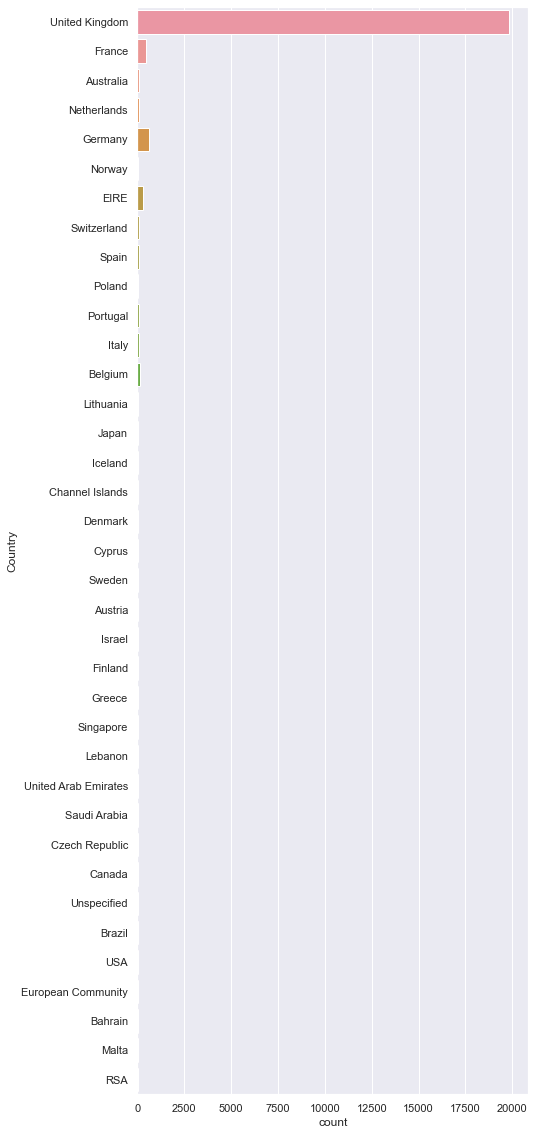

In [70]:
# plt.rcParams['figure.figsize']=(x,y)
plt.rcParams['figure.figsize']=(7,20)

sns.set_theme(style="darkgrid")
ax = sns.countplot(y = "Country", data = df)

In [71]:
print("Summary:")
#exploring the unique values of each attribute
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )

Summary:
Number of transactions:  22190
Number of products bought:  2656
Number of customers: 4372


#### Summary:

* Clean Data collection is from 37 countries.
* Percentage of customers NA:  24.93 %. Data Collection pipeline is not working as expected.
* The data collection mostly contains data of United Kingdom.

## **RFM** (Recency, Frequency, Monetary) analysis 

RFM is a customer segmentation technique that uses past purchase behavior to divide customers into groups. 
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- RECENCY (R): Number of days since last purchase.
- FREQUENCY (F): Total number of purchases by each customer.
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

In [27]:
from datetime import datetime

# converting object to timestamp
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [48]:
#last date available in our dataset
now = df['InvoiceDate'].max()
now

Timestamp('2011-12-09 12:50:00')

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [47]:
# Group by customers and check last date of purshace
recency_df = df.groupby(by='CustomerID', as_index = False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [50]:
# Calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


## Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check **how many invoices are registered by the same customer**.

In [53]:
# Drop Duplicate
df_copy = df
df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace = True)

# Calculate frequency of purchases
frequency_df = df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [57]:
# making new column called total bill
df["total_bill"] = df["Quantity"] * df["UnitPrice"]
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_bill
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [58]:
monetary_df = df.groupby(by = 'CustomerID', as_index = False).agg({'total_bill': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


### Creating RFM Table:


In [59]:
# Merge Recency with Frequency Dataframe
temp_df = recency_df.merge(frequency_df, on = 'CustomerID')
temp_df.head()

,CustomerID,LastPurchaseDate,Recency,Frequency
0,12346.0,2011-01-18 10:17:00,325,2
1,12347.0,2011-12-07 15:52:00,1,7
2,12348.0,2011-09-25 13:13:00,74,4
3,12349.0,2011-11-21 09:51:00,18,1
4,12350.0,2011-02-02 16:01:00,309,1


In [60]:
# merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df, on = 'CustomerID')

# use CustomerID as index
rfm_df.set_index('CustomerID', inplace = True)
rfm_df.head()

,LastPurchaseDate,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,2011-01-18 10:17:00,325,2,0.00
12347.0,2011-12-07 15:52:00,1,7,163.16
12348.0,2011-09-25 13:13:00,74,4,331.36
12349.0,2011-11-21 09:51:00,18,1,15.00
12350.0,2011-02-02 16:01:00,309,1,25.20


### Segmentation 

* Customer Segmentation based on `Recency` value:

    * High recency indicates that customer has not returned back. This indicates, customer is not happy with the purchases they made or has shifted their house to some other location.
    
* Customer Segmentation based on `Frequency` value:
    * High Frequency indicates that customer is happy with the purchases he makes and is more likely to return than other customers.
    
* Customer Segmentation based on `Monetary` value:
    * High Monetary Value indicates that the customer was willing to spend more money than other customers.
    

In [62]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles
quantiles.to_dict()

{'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 15.0, 0.5: 39.5, 0.75: 110.08250000000001}}

In [63]:
# low recency should be rated higher number i.e. 4

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    

#------------------------------------------------------------------------------------
# High Frequency and Monetary values should be rated higher number i.e. 4

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args = ('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args = ('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args = ('Monetary',quantiles,))

In [64]:
rfm_segmentation.head()

,LastPurchaseDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,
12346.0,2011-01-18 10:17:00,325,2,0.00,1,2,1
12347.0,2011-12-07 15:52:00,1,7,163.16,4,4,4
12348.0,2011-09-25 13:13:00,74,4,331.36,2,3,4
12349.0,2011-11-21 09:51:00,18,1,15.00,3,1,1
12350.0,2011-02-02 16:01:00,309,1,25.20,1,1,2


In [67]:
# we then combine the 3 scores the way letter of strings are combined

In [65]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,LastPurchaseDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
12346.0,2011-01-18 10:17:00,325,2,0.00,1,2,1,121
12347.0,2011-12-07 15:52:00,1,7,163.16,4,4,4,444
12348.0,2011-09-25 13:13:00,74,4,331.36,2,3,4,234
12349.0,2011-11-21 09:51:00,18,1,15.00,3,1,1,311
12350.0,2011-02-02 16:01:00,309,1,25.20,1,1,2,112


* Best Recency score = 4 --> most recently purchase. 
* Best Frequency score = 4 --> most quantity purchase. 
* Best Monetary score = 4 --> spent the most.

In [66]:
# The Top 10 Customers:

rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,LastPurchaseDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
18102.0,2011-12-09 11:50:00,0,62,38834.79,4,4,4,444
17949.0,2011-12-08 18:46:00,0,52,25593.67,4,4,4,444
17450.0,2011-12-01 13:29:00,7,55,20062.47,4,4,4,444
14646.0,2011-12-08 12:12:00,1,77,18688.06,4,4,4,444
16013.0,2011-12-06 10:36:00,3,54,15437.88,4,4,4,444
16333.0,2011-12-02 12:19:00,7,22,14418.96,4,4,4,444
15769.0,2011-12-02 13:52:00,6,29,10185.24,4,4,4,444
12901.0,2011-12-01 10:07:00,8,36,8240.21,4,4,4,444
13798.0,2011-12-08 15:51:00,0,63,7831.76,4,4,4,444


In [68]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore'] == '444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile'] == 4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile'] == 4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore'] == '244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore'] == '144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore'] == '111']))

Best Customers:  420
Loyal Customers:  1087
Big Spenders:  1093
Almost Lost:  80
Lost Customers:  15
Lost Cheap Customers:  298


### References:

Link : https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales

This article clearly explains how RFM is performed. 

### Actions to take:

From what I can think of on top of my head:

**Best Customers** : Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

**At Risk or Almost Lost**: Send them personalized emails to encourage them to shop.